# Week10 - Lab

* Use PCA to reduce dimentionality and use a linear regression to predict
* Use t-SNE to visualize

In [1]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X = cancer['data']
y = cancer['target']
print(cancer.target_names)

['malignant' 'benign']


In [2]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)

print(f'Training examples: {X_train.shape[0]:,}')
print(f'Test examples: {X_test.shape[0]:,}')

Training examples: 455
Test examples: 114


Step 1 - Scale the Data

In [4]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)

Step 2 - Covariance matrix

In [5]:
import numpy as np

cov_mat = np.cov(X_train_std.T)
print(cov_mat.round(1))

[[ 1.   0.3  1.   1.   0.2  0.5  0.7  0.8  0.2 -0.3  0.7 -0.1  0.7  0.7
  -0.2  0.2  0.2  0.4 -0.1 -0.   1.   0.3  1.   0.9  0.1  0.4  0.6  0.8
   0.2  0. ]
 [ 0.3  1.   0.3  0.3 -0.   0.2  0.3  0.3  0.1 -0.1  0.3  0.4  0.3  0.3
  -0.   0.2  0.2  0.2 -0.   0.   0.4  0.9  0.4  0.3  0.   0.3  0.3  0.3
   0.1  0.1]
 [ 1.   0.3  1.   1.   0.2  0.6  0.7  0.9  0.2 -0.3  0.7 -0.1  0.7  0.7
  -0.2  0.3  0.3  0.4 -0.1  0.   1.   0.3  1.   0.9  0.2  0.5  0.6  0.8
   0.2  0.1]
 [ 1.   0.3  1.   1.   0.2  0.5  0.7  0.8  0.2 -0.3  0.7 -0.   0.7  0.8
  -0.1  0.2  0.2  0.4 -0.1  0.   1.   0.3  1.   1.   0.1  0.4  0.6  0.7
   0.2  0. ]
 [ 0.2 -0.   0.2  0.2  1.   0.7  0.5  0.5  0.6  0.6  0.3  0.   0.3  0.3
   0.3  0.3  0.3  0.3  0.2  0.3  0.2  0.   0.3  0.2  0.8  0.5  0.4  0.5
   0.4  0.5]
 [ 0.5  0.2  0.6  0.5  0.7  1.   0.9  0.8  0.6  0.5  0.5  0.1  0.6  0.5
   0.1  0.7  0.6  0.6  0.2  0.5  0.6  0.2  0.6  0.6  0.5  0.9  0.8  0.8
   0.5  0.7]
 [ 0.7  0.3  0.7  0.7  0.5  0.9  1.   0.9  0.5  0.3  0.7  

Step 3 - Decompose into eigenvectors and eigenvalues

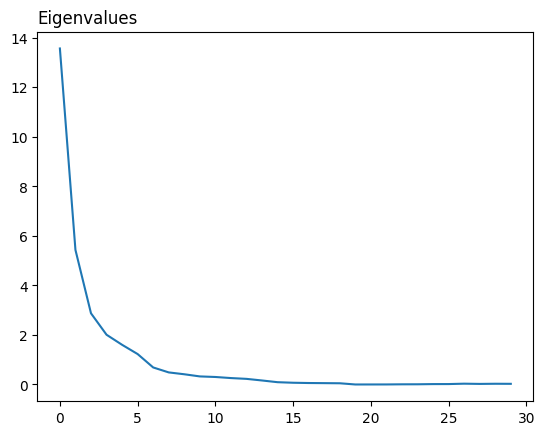

In [6]:
import matplotlib.pyplot as plt

eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

plt.plot(eigen_vals)
plt.title('Eigenvalues', loc='left')
plt.show()

In [7]:
print(eigen_vals)

[1.35686698e+01 5.43501722e+00 2.87444142e+00 2.00885593e+00
 1.60233333e+00 1.22853416e+00 6.87644489e-01 4.87307573e-01
 4.12579341e-01 3.25737955e-01 3.02731078e-01 2.59117025e-01
 2.26905019e-01 1.61552250e-01 9.22791855e-02 7.00485523e-02
 5.89934230e-02 5.42018146e-02 4.88085783e-02 1.21883016e-04
 7.59377587e-04 1.51010194e-03 6.67768656e-03 8.00245917e-03
 1.56724049e-02 1.67563933e-02 3.22675427e-02 2.29478892e-02
 2.91819130e-02 2.64235179e-02]


In [8]:
print(eigen_vecs)

[[-2.21008647e-01  2.29722087e-01  1.86507920e-03 -4.23637085e-02
   4.88863314e-02 -2.55528102e-02  1.29805522e-01  3.48586265e-02
  -1.56722201e-01  1.85238268e-01 -2.26137734e-02 -2.80800611e-02
   3.04026496e-02 -6.75528322e-02 -8.46748711e-02 -6.59022568e-02
   2.78507579e-01 -7.71062722e-02 -2.05435112e-01  6.98774758e-01
  -2.26525037e-01  2.05855685e-01  1.34670964e-01 -1.20580938e-01
  -9.14197191e-02 -1.51225687e-01  9.49940137e-02  9.97675272e-02
   8.76514660e-02  6.85706788e-03]
 [-1.02198249e-01  7.07152432e-02  8.00256259e-02  5.82618063e-01
  -1.17194557e-01  7.87374812e-02 -3.50307371e-02  1.06125069e-01
   2.41394271e-01  1.22654601e-01 -3.22815370e-01 -2.23257697e-01
   2.23629121e-01  5.50240173e-02 -1.37378050e-01 -1.45758251e-01
  -1.71153923e-02  5.55492469e-02 -7.05029905e-02  8.74942710e-04
   1.30558075e-02 -3.56104903e-03  3.98832315e-02 -2.05676620e-02
   1.39263543e-01  6.10950134e-02 -3.88078989e-01 -4.70047368e-02
   2.92467582e-01 -1.17184891e-01]
 [-2.2

Step 4 and Step 5 - Sort the eigenvalues and select k eigenvectors to be used as the principal components

In [9]:
tot = sum(eigen_vals)

var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

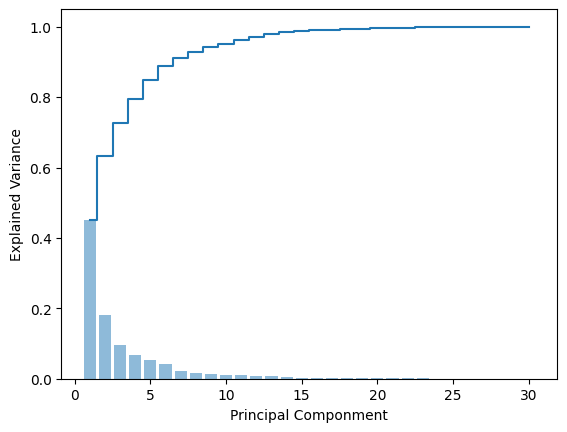

In [10]:
plt.bar(range(1,31), var_exp, alpha=0.5, align='center', label='Variance Explained')
plt.step(range(1,31), cum_var_exp, where='mid', label='Cumulative Explained')
plt.xlabel('Principal Componment')
plt.ylabel('Explained Variance')
plt.show()

First and second principal component explain about 60% of the data so k will be set to 2

Step 6 - Projection Matrix

In [11]:
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

In [12]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis],
              eigen_pairs[1][1][:, np.newaxis]))

print(w)

[[-0.22100865  0.22972209]
 [-0.10219825  0.07071524]
 [-0.22867577  0.21232429]
 [-0.22330521  0.22427501]
 [-0.14011811 -0.18617534]
 [-0.23806436 -0.15088592]
 [-0.25818721 -0.0500355 ]
 [-0.25930043  0.04007502]
 [-0.14239513 -0.17755012]
 [-0.05455281 -0.37696724]
 [-0.20876206  0.08966681]
 [-0.02392238 -0.09724396]
 [-0.21183839  0.07316248]
 [-0.20401192  0.13648339]
 [-0.01731891 -0.21223659]
 [-0.16586127 -0.24561623]
 [-0.15689613 -0.20594118]
 [-0.17945727 -0.14232233]
 [-0.04250258 -0.19317868]
 [-0.10414427 -0.30050114]
 [-0.23060519  0.21249813]
 [-0.10117507  0.05675996]
 [-0.23848016  0.19254462]
 [-0.22861783  0.20949044]
 [-0.12174031 -0.16540137]
 [-0.20906949 -0.13538909]
 [-0.23071508 -0.07839547]
 [-0.24851075  0.01852622]
 [-0.12021811 -0.12394288]
 [-0.12898534 -0.27869325]]


Step 7 - Transform

In [13]:
X_train_pca = X_train_std.dot(w)
X_train_pca

array([[ 2.75791535e+00,  2.62459184e+00],
       [-5.23668335e+00,  2.27763765e+00],
       [-1.87745213e+00,  2.52960002e-01],
       [ 1.51182057e+00,  1.10411267e+00],
       [-4.23862228e+00, -8.84514175e-01],
       [ 4.32056812e+00,  9.35207222e-01],
       [ 4.00712052e+00,  3.13265170e-01],
       [ 7.25799466e-01, -6.50416019e-01],
       [ 3.45194410e+00,  2.13902420e+00],
       [ 4.21877316e+00, -1.01852218e-01],
       [ 3.01794485e+00,  6.98642626e-01],
       [ 3.88866598e+00, -1.25783847e+00],
       [ 2.86178947e+00,  5.21515681e-01],
       [ 2.29674950e+00, -7.23183415e-01],
       [-2.28882780e+00,  2.69848919e+00],
       [ 2.97849093e+00,  2.82703707e+00],
       [ 1.13187254e+00, -1.02466852e+00],
       [-8.69566851e+00,  3.16482207e+00],
       [-2.31124006e+00,  3.44298160e-01],
       [ 2.78354122e+00,  1.79637391e+00],
       [ 4.59282188e+00,  2.83549398e+00],
       [ 2.44462715e+00, -4.13291501e-01],
       [ 1.22566120e+00, -3.63913656e+00],
       [ 4.

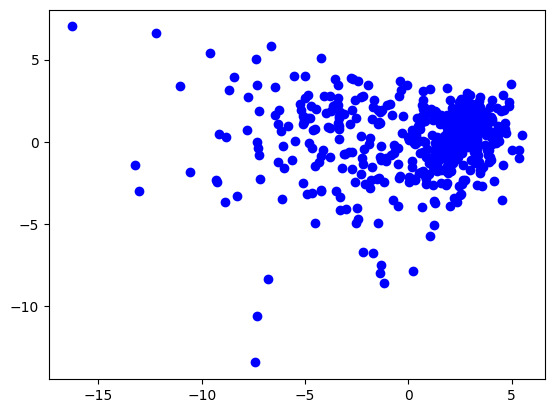

In [14]:
plt.plot(X_train_pca[:,0], X_train_pca[:,1], 'bo')
plt.show()

Using PCA with Logistic Regression

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA

p = Pipeline([('scaling', StandardScaler()), 
              ('pca', PCA(n_components=2)),
              ('model', LogisticRegression())
             ])

params = {'model__C': [0.01, 0.1, 1, 10]}

cancer_search = GridSearchCV(p, param_grid=params, scoring='accuracy', cv=10, refit=True)
cancer_search = cancer_search.fit(X_train, y_train)

cancer_search.best_estimator_

Pipeline(steps=[('scaling', StandardScaler()), ('pca', PCA(n_components=2)),
                ('model', LogisticRegression(C=1))])

In [16]:
print(f'Validation score: {cancer_search.best_score_:.2%}')
print(f'Test score: {cancer_search.score(X_test, y_test):.2%}')

Validation score: 96.48%
Test score: 92.98%


Use t-SNE to visualize

Completed in 0:00:01.468042


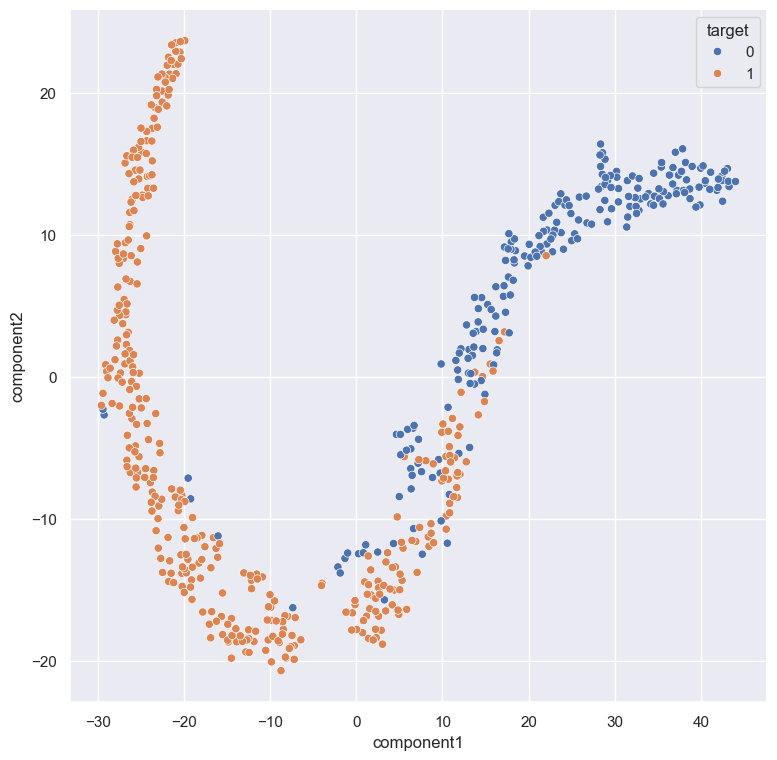

In [17]:
import pandas as pd
from sklearn.manifold import TSNE
import datetime

y_series = pd.Series(y)

ts_start = datetime.datetime.now()
tsne_model = TSNE(n_components=2, 
            init='random', 
            learning_rate='auto', 
            perplexity=30)

tsne = tsne_model.fit_transform(X)

ts_end = datetime.datetime.now()

print(f'Completed in {ts_end-ts_start}')

tsne_df = pd.DataFrame(tsne)
# tsne_df.index = cancer.index.tolist()
tsne_df.columns = ['component1', 'component2']

tsne_df = pd.concat([tsne_df, y_series], axis=1)
tsne_df.rename(columns = {0: 'target'}, inplace=True)

import seaborn as sns

sns.set(rc={'figure.figsize':(9,9)})
sns.scatterplot(x='component1', y='component2', hue='target', data=tsne_df)
plt.show()